In [1]:
import csv
from collections import defaultdict
import matplotlib.pyplot as plt
import copy

In [5]:
results = []
sizes   = []

with open('dataset_size_results.csv') as f:
    reader = csv.DictReader(f)
    for row in reader:
        vals = copy.deepcopy(row)
        del vals['Dataset Size']
        size = int(row['Dataset Size'])
        sizes.append(size)
        results.append( vals )

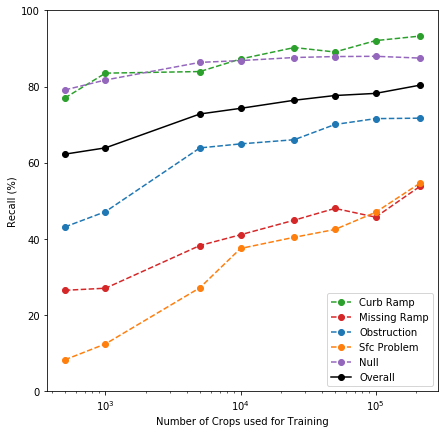

In [7]:
plt.figure(figsize=(7,7))
for label, color in (('Curb Ramp', 'C2'), ('Missing Ramp', 'C3'), ('Obstruction','C0'), ('Sfc Problem','C1'), ('Null','C4'), ('Overall','black')):
    acc = []
    for i, size in enumerate(sizes):
        acc.append(float(results[i][label]))
    
    line   = 'dashed' if label != 'Overall' else 'solid'
    plt.plot(sizes, acc, label=label, linestyle=line, marker='o', color=color)
plt.xlabel("Number of Crops used for Training")
plt.ylabel('Recall (%)')
plt.ylim(0,100)
plt.xscale('log')
plt.legend()
plt.savefig('/Users/galenweld/sidewalk-cv-assets19/figures_for_paper/pngs/amount_training_data.png', dpi = 300)
plt.show()